# Computer Vision for medical image processing
By: MSc Michał Karol <michal.karol@pwr.edu.pl>

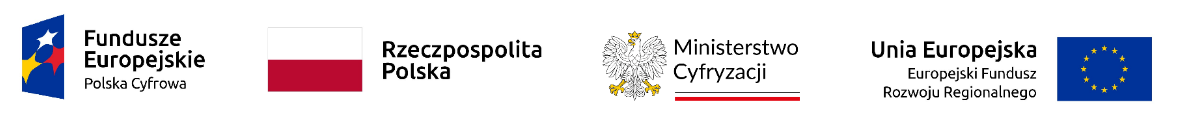

## Abstract
Computer vision has emerged as a revolutionary technology in the medical field, bringing significant transformations in various aspects of healthcare. Its application in clinical practice has paved the way for improved diagnostics, more accurate disease detection, and enhanced treatment planning. The objective of this workshop is to bring comprehensive understanding of the impact of computer vision in clinical practice. Participants will gain insights into how this technology is reshaping healthcare and improving patient outcomes. By exploring the latest advancements in certified medical systems, attendees will learn about the integration of computer vision into existing medical frameworks and protocols. Moreover, the workshop will delve into current research areas within computer vision in medicine. Participants will be introduced to cutting-edge studies and ongoing projects that aim to further enhance the capabilities of computer vision in the healthcare domain. In the second part of the workshop, there will be an interactive session focused on implementing classification and segmentation networks using the JAX framework and the Flax library.

## Theoretical part

### Introduction

Artificial Intelligence is now changing and transforming variuos aspects of healthcare. From novel drug-discovery, via digital twins for improved clinical trains to CT/MRI images processing. The complexity of analysed data, as well as ethical and legal aspects are making AI development in medicine a demanding task. Despite that fact, more and more Computer Vison algorithms are certified and accepted for widepread clinical use.

Major research areas include:
* Medical Imaging Analysis in form of processing CT/MRI/X-Ray data to provide early disease detection (COVID-19 X-ray screening), abnormality detection (especially useful in stroke detection), organ/cancer detection and segmentation
* Skin leasion classification for easy stage melanoma detection. Melanoma can spread to brain giving very low survivability rates for those affected by it.
* Diabetic Retinopathy Detection based on retinal images, allowing for early stage diagnosis and treatment before vision loss.
* Histopathology cell counting and classification used for automatic calculation of eg. Proliferation Index in breast cancer diagnosis and treatment planning.
* Tissue classification and segmentation for automatic cancer stage classification and explainablility.
* Digital virtual endoscopy, that allows scanning whole diagestive track and automated anomaly flagging.

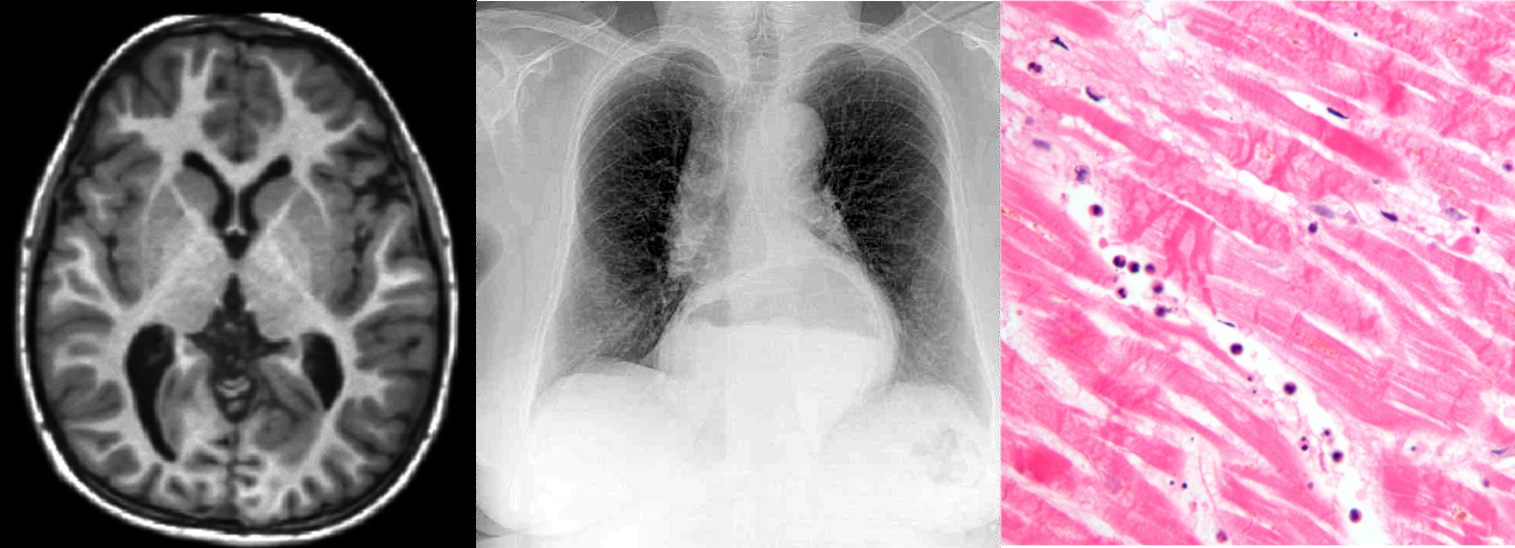
<!-- from https://en.wikipedia.org/wiki/Histopathology#/media/File:MI_with_contraction_bands_very_high_mag.jpg -->
<!-- https://en.wikipedia.org/wiki/X-ray#/media/File:Radiograf%C3%ADa_pulmones_Francisca_Lorca.cropped.jpg -->
<!-- https://en.wikipedia.org/wiki/Magnetic_resonance_imaging#/media/File:T1-weighted-MRI.png -->

### Challanges
Let's review in depth most important challanges related with AI in medicine.

#### Dataset complexity, scarcity and bias
Most important challange is data complexity. Medical datasets are often prone to errors during annotation process. Depending on the manufacturer, data formats differ and what is the most important, human tissues vary form sample to sample and from laboratory to laboratory. This is exacly the case why during working with medical images we have to analize possible biases included in our dataset. One of the most famous examples of dataset bias in computer vision in medicine is a case when dataset containing lung X-rays for classification task after more thorough inspection revealed that one class was differenciable by medical tag in one of the corners. After augmentation of dataset by removing the tag, results of best scoring models severly dropped, and GradCam was used to visualize the issue. Additionally due to high cost of employment of human experts in a field, high-quality medical datasets are often not shared publicly.

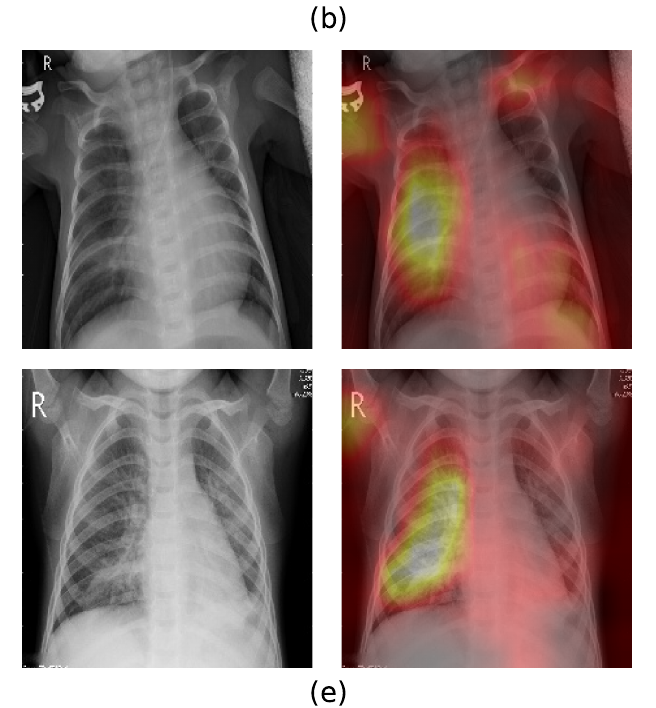
<!-- https://arxiv.org/abs/2103.03055 -->


#### Legal aspects
AI in medicine is still a new topic. Currently there is small number of algorithms that are approved by FDA or EMA for clinical use, but fortunately this list still grows. [https://medicalfuturist.com/fda-approved-ai-based-algorithms/](https://medicalfuturist.com/fda-approved-ai-based-algorithms/) aggregates some of those alogoritms and how they are using AI in its core. What is more, goverment bodies like Polish Ministerstwo Zdrowia or German Bundesinstitut für Arzneimittel und Medizinprodukte (BfArM) are currently working on preparing local regulations and participating in expanding regional policies. In case of Poland, there is set of policies for use of AI in medicine and healthcare called ["Biała księga AI w praktyce klinicznej"](https://www.gov.pl/web/ai/sztuczna-inteligencja-w-medycynie). This is a result of works between goverment bodies and top Polish companies involved in this topic. 

#### Ethical aspects
Major concerns regarding AI in medicine are bioethical controversies involving private data processing or data allowing for deanonymization of human subjects (eg. face photos) or specific case details. Except for standard data privacy rules enforced by GDPR rules, there are also legal implications of data leakage to the public. Another aspect worth noted during describing this section is respect to the human tissue/images donated by the volunteers. All those aspects have to taken into account during AI in medicine developent. 



### Actual use

Currently most visible use in medicine of computer vision techniques is in patient triage. There are multiple companies (eg. Qure AI, RADLogics) that have already implemented software for patient traiage and queuing. One trick used by qure.ai is certifing software as a triage tool, expoiting highly sensitive nature of a software for detecting normal/abnormal cases allowing radiologgists to focus on more urgent cases. [Source](https://qure.ai/evidence/automated-classification-of-x-rays-as-normal-abnormal-using-a-high-sensitivity-deep-learning-algorithm/).

Another considerable group of software is histopathology/pathomorphology software used for automatic flagging for further reinvestigation as well as automatic cell counting and cancer stage classification. Such software like QuPath or ImageJ allow for organizing and improving performace of manual lab work required to make a diagosis. 

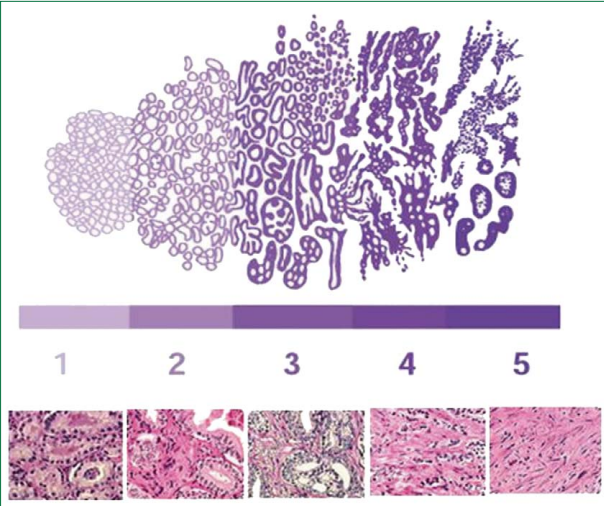
<!-- https://www.thelancet.com/journals/lanonc/article/PIIS1470204507701365/fulltext -->

### How it's going (current reaserch and emerging fields)

### Explainable AI
This is very hot topic in medical AI for a very long time. Product certification require aggreement with medical software developent process and quality assurace. One of the ascpect is ability to explain the decision process of a software using either explainable AI methods like GradCam, Integrated Gradients or pass thorough testing. 
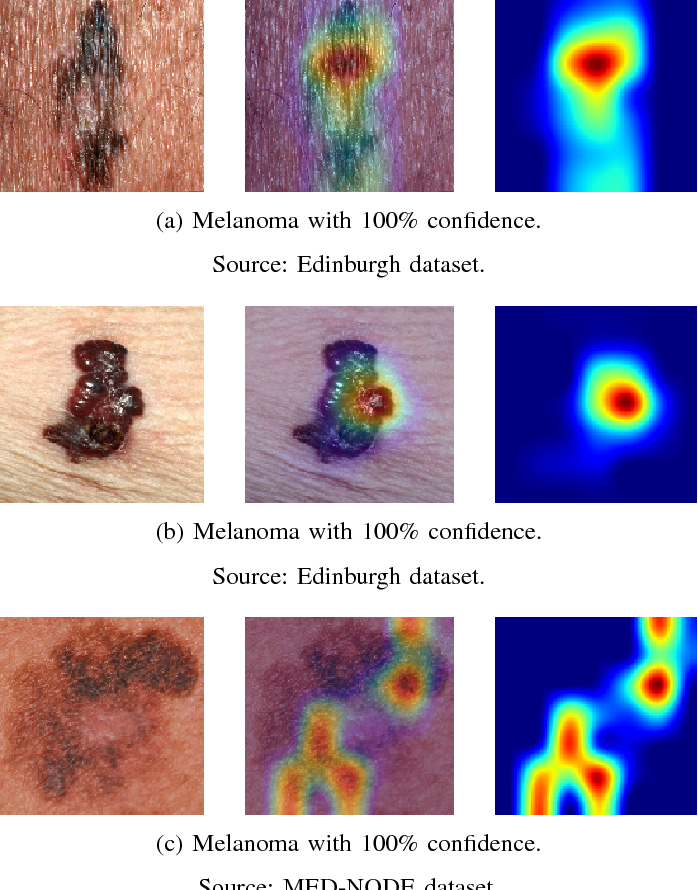
<!-- https://arxiv.org/abs/1812.02316 -->

### Semi-supervised or unsupervised learning
Currently more and more methods using semi-supervised learning like SimCLR or unsupervised methods like diffiusion models are used in contect of processing medical data. Such approach allows for full utilization of medical datasets. Automatic segmetation of cancer tumors using semi-supervised learning on 3D data is a promising direction of research. As for diffusion models, those are slowly introduced to the field in order to generate new data to improve dowstream models capabilities. 
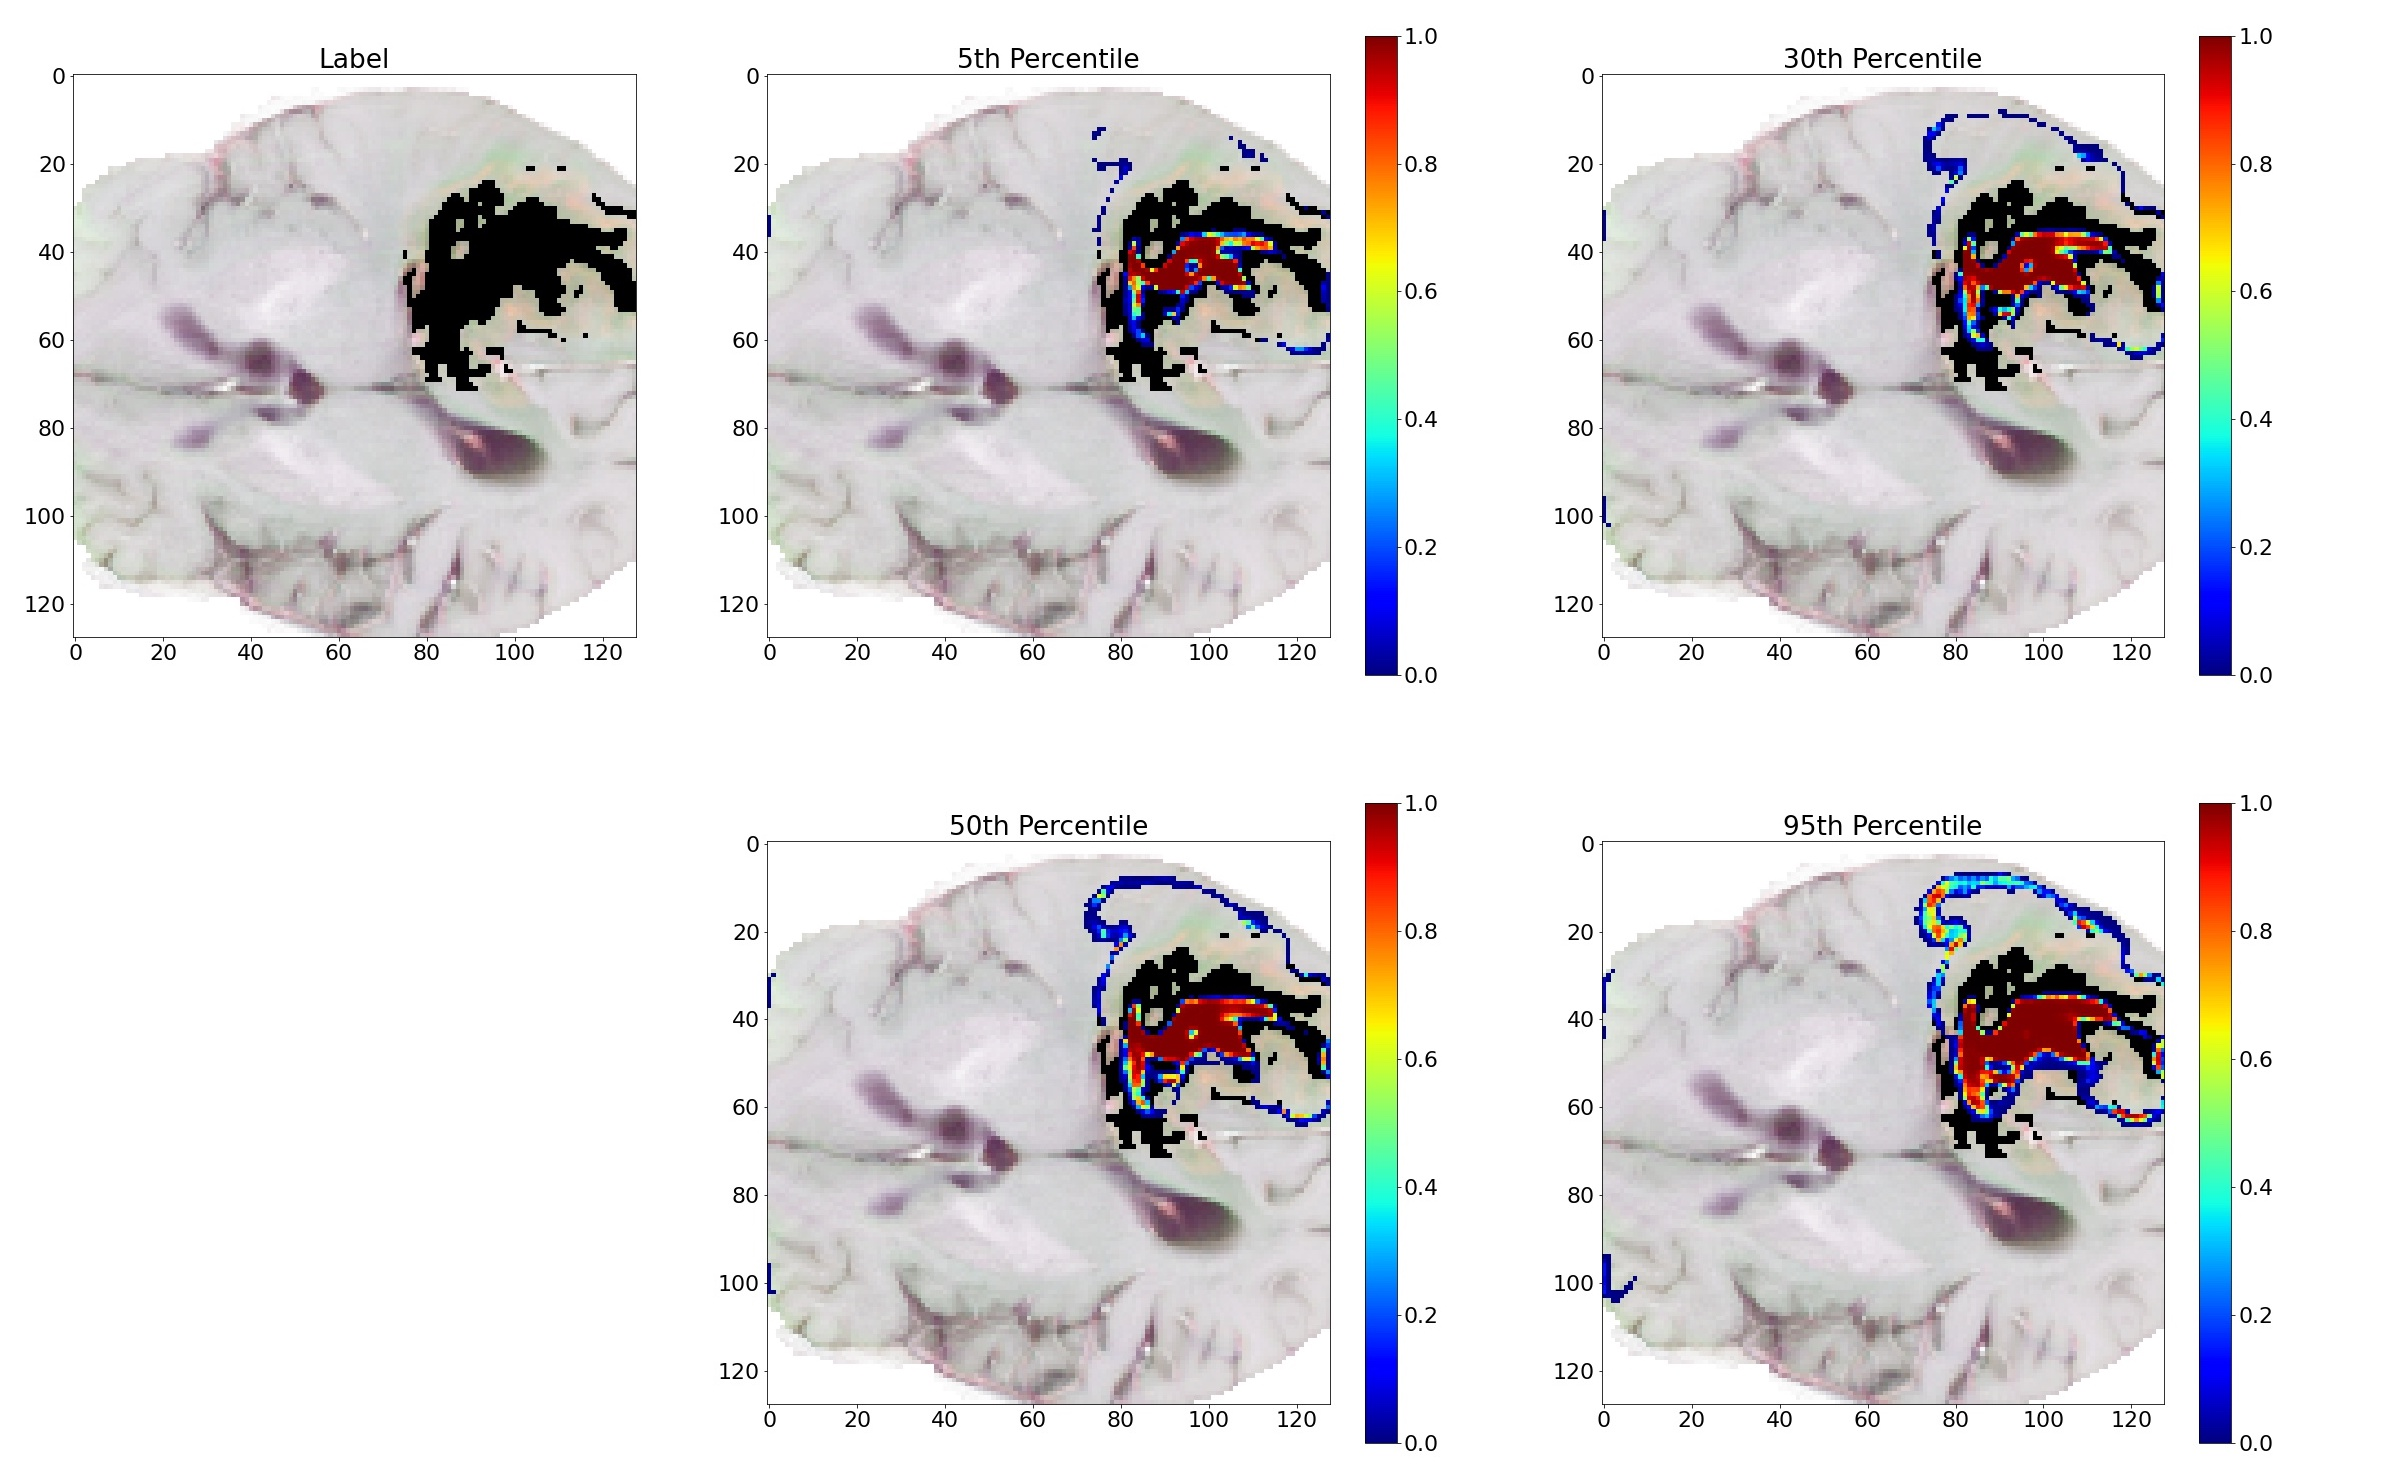
<!-- https://arxiv.org/abs/2109.14288 -->

## Practical excercices

### Introduction to JAX and Flux

* JAX is Autograd and XLA, brought together for high-performance numerical computing brought to you by Google
JAX provides a familiar NumPy-style API for ease of adoption by researchers and engineers.  
JAX includes composable function transformations for compilation, batching, automatic differentiation, and parallelization.  
The same code executes on multiple backends, including CPU, GPU, & TPU  

* Flax is a high-performance neural network library for JAX that is designed for flexibility, equivalent to Pytorch


### Simple CNN - basics of JAX and Flux
As we are talking about Computer Vision, let's start with the most iconic dataset for CV - MNIST.

In [ ]:
!pip install torchvision flax matplotlib scikit-learn pandas opencv-python

In [ ]:
!pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html --force-reinstall

In [ ]:
%env XLA_PYTHON_CLIENT_PREALLOCATE=false
%env XLA_PYTHON_CLIENT_ALLOCATOR=platform

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import torch
import random
import matplotlib.pyplot as plt
from flax import linen as nn
from functools import partial
import jax
import jax.numpy as jnp
from flax.training import train_state
import optax
import tqdm.notebook as tqdm
import numpy as np
from sklearn.metrics import f1_score
import os
import pathlib
import pandas as pd
import cv2 as cv
from typing import Any

#### Download dataset, shuffle, transform and batch data

In [ ]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [ ]:
BATCH_SIZE = 256
LEARNING_RATE = 1e-4
NUM_OF_EPOCH = 10

In [ ]:
def collate_fn(batch):
  return dict(
    image=np.stack([np.transpose(img.numpy(), (1, 2, 0)) for img,_ in batch]),
    label=np.stack([label for _,label in batch])
  )

def get_mnist(batch_size):
  train_mnist_dataset = datasets.MNIST('./data', download=True, train=True, transform=transforms.ToTensor())
  test_mnist_dataset = datasets.MNIST('./data', download=True, train=False, transform=transforms.ToTensor())
  train_dataloader = DataLoader(train_mnist_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=os.cpu_count() or 0)
  test_dataloader = DataLoader(test_mnist_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=os.cpu_count() or 0)
  return train_dataloader, test_dataloader

In [ ]:
single_batch = next(iter(get_mnist(9)[0]))
figure = plt.figure(figsize=(10,10))
rows = len(single_batch["image"])

for i in range(rows):
    plt.subplot(3, 3, i + 1, title=single_batch["label"][i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(single_batch["image"][i])

Build our architecture

In [ ]:
class CNN(nn.Module):
  def setup(self):
    self.conv_0 = nn.Conv(features=32, kernel_size=(3, 3))
    self.pool_0 = partial(nn.avg_pool, window_shape=(2, 2), strides=(2, 2))
    self.conv_1 = nn.Conv(features=32, kernel_size=(3, 3))
    self.pool_1 = partial(nn.avg_pool, window_shape=(2, 2), strides=(2, 2))
    self.fc_0 = nn.Dense(features=256)
    self.fc_1 = nn.Dense(features=10)

  def __call__(self, x):
    x = self.conv_0(x)
    x = nn.relu(x)
    x = self.pool_0(x)
    x = self.conv_1(x)
    x = nn.relu(x)
    x = self.pool_1(x)
    x = x.reshape((x.shape[0], -1))
    x = self.fc_0(x)
    x = nn.relu(x)
    x = self.fc_1(x)
    return x

In [ ]:
model = CNN()
rng_key = jax.random.PRNGKey(0)
init_input = jnp.ones((1, 28, 28, 1))

In [ ]:
# Tabulate
print(model.tabulate(rng_key, init_input, console_kwargs={'force_jupyter': True}))

In [ ]:
params = model.init(rng_key, init_input)
jax.tree_map(lambda x: x.shape, params)

In [ ]:
def init_train_state(
    model, random_key, init_input, learning_rate
) -> train_state.TrainState:
    variables = model.init(random_key, init_input)
    optimizer = optax.adam(learning_rate)
    return train_state.TrainState.create(
        apply_fn = model.apply,
        tx=optimizer,
        params=variables['params']
    )

state = init_train_state(
    model, rng_key, init_input, LEARNING_RATE
)

In [ ]:
state

In [ ]:
@jax.jit
def train_step(state, batch):
  def loss_fn(params):
    logits = state.apply_fn({'params': params}, batch['image'])
    loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=batch['label']).mean()
    return loss
  grad_fn = jax.grad(loss_fn)
  grads = grad_fn(state.params)
  state = state.apply_gradients(grads=grads)
  return state

In [ ]:
def compute_metrics(*, state, batch):
  logits = state.apply_fn({'params': state.params}, batch['image'])
  loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=batch['label']).mean()
  accuracy = np.mean(np.argmax(logits, -1) == batch['label'])
  f1score  = f1_score(np.argmax(logits, -1), batch['label'], average="macro")
  return {'loss': loss, 'accuracy': accuracy, "f1": f1score}

In [ ]:
metrics_history = {
    'train_loss': [],
    'train_accuracy': [],
    'train_f1': [],
    'test_loss': [],
    'test_accuracy': [],
    'test_f1': [],
}

In [ ]:
train_ds, test_ds = get_mnist(BATCH_SIZE)
for epoch in range(NUM_OF_EPOCH):
    train_len = len(train_ds)
    test_len = len(test_ds)

    train_metrics = np.zeros((train_len, 3))
    with tqdm.tqdm(total=train_len+test_len, desc=f"Epoch: {epoch}") as pbar:
      for step, batch in enumerate(iter(train_ds)):
        state = train_step(state, batch)
        metrics = compute_metrics(state=state, batch=batch)
        train_metrics[step, 0] = metrics["loss"]
        train_metrics[step, 1] = metrics["accuracy"]
        train_metrics[step, 2] = metrics["f1"]
        pbar.set_postfix(dict(
            mean_loss=np.mean(train_metrics[:(step+1), 0]),
        ))
        pbar.update()

      metrics_history['train_loss'].append(np.mean(train_metrics[:, 0]))
      metrics_history['train_accuracy'].append(np.mean(train_metrics[:, 1]))
      metrics_history['train_f1'].append(np.mean(train_metrics[:, 2]))

      # Validation
      test_metrics = np.zeros((test_len, 3))
      for step, test_batch in enumerate(iter(test_ds)):
        metrics = compute_metrics(state=state, batch=test_batch)
        test_metrics[step, 0] = metrics["loss"]
        test_metrics[step, 1] = metrics["accuracy"]
        test_metrics[step, 2] = metrics["f1"]
        pbar.set_postfix(dict(
            mean_loss=metrics_history['train_loss'][-1],
            mean_accuracy=np.mean(test_metrics[:(step+1), 1]),
            mean_f1=np.mean(test_metrics[:(step+1), 2])
        ))
        pbar.update()

      metrics_history['test_loss'].append(np.mean(test_metrics[:, 0]))
      metrics_history['test_accuracy'].append(np.mean(test_metrics[:, 1]))
      metrics_history['test_f1'].append(np.mean(test_metrics[:, 2]))


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.set_title('Loss')
ax2.set_title('Accuracy')
ax3.set_title('F1')
for dataset in ('train','test'):
  ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')
  ax2.plot(metrics_history[f'{dataset}_accuracy'], label=f'{dataset}_accuracy')
  ax3.plot(metrics_history[f'{dataset}_f1'], label=f'{dataset}_f1')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()
plt.clf()

### Dataset download GlaS

In [ ]:
!wget https://warwick.ac.uk/fac/cross_fac/tia/data/glascontest/download/warwick_qu_dataset_released_2016_07_08.zip

In [ ]:
!unzip -n warwick_qu_dataset_released_2016_07_08.zip

In [ ]:
def wb(channel, perc=0.05):
    mi, ma = (np.percentile(channel, perc), np.percentile(channel, 100.0 - perc))
    channel = np.uint8(np.clip((channel - mi) * 255.0 / (ma - mi), 0, 255))
    return channel


def adjust_rgb_wb(image):
    return np.dstack([wb(channel, 0.05) for channel in cv.split(image)])

In [ ]:
class GlaSDataset(Dataset):
    def __init__(self, dataset_dir: str, prefix="train"):
        self.dataset_dir = dataset_dir
        grades = pd.read_csv(pathlib.Path(dataset_dir).joinpath("Grade.csv"))
        self.ds_grades = grades[grades["name"].str.startswith(prefix)]

    def __getitem__(self, index):
        name = self.ds_grades.iloc[index]["name"]
        grade = self.ds_grades.iloc[index][" grade (GlaS)"].strip()

        img_path = pathlib.Path(self.dataset_dir).joinpath(f"{name}.bmp")
        ann_img_path = pathlib.Path(self.dataset_dir).joinpath(f"{name}_anno.bmp")
        img = adjust_rgb_wb(cv.cvtColor(cv.imread(str(img_path)), cv.COLOR_BGR2RGB))
        scaled_img = cv.resize(img, (512, 512))
        ann_img = cv.cvtColor(cv.imread(str(ann_img_path)), cv.COLOR_BGR2GRAY)
        scaled_ann_img = cv.resize(ann_img, (512, 512))
        transformed_ann_img = np.where(scaled_ann_img > 0, 1, 0)
        num_grade = 0 if grade == "benign" else 1

        return scaled_img, transformed_ann_img, num_grade

    def __len__(self):
        return len(self.ds_grades)

In [ ]:
def collate_fn(batch):
  return dict(
    image=np.stack([img for img,_, _ in batch]),
    annotation_image=np.stack([ann_img for _,ann_img, _ in batch]),
    grade=np.stack([grade for _,_,grade in batch]),
  )

def get_glas(batch_size):
  train_dataset = GlaSDataset("./Warwick QU Dataset (Released 2016_07_08)", prefix="train")
  testA_dataset = GlaSDataset("./Warwick QU Dataset (Released 2016_07_08)", prefix="testA")
  testB_dataset = GlaSDataset("./Warwick QU Dataset (Released 2016_07_08)", prefix="testB")
  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=os.cpu_count() or 0)
  testA_dataloader = DataLoader(testA_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=os.cpu_count() or 0)
  testB_dataloader = DataLoader(testB_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=os.cpu_count() or 0)
  return train_dataloader, testA_dataloader, testB_dataloader

In [ ]:
single_batch = next(iter(get_glas(9)[0]))
figure = plt.figure(figsize=(5,20))
rows = len(single_batch["image"])

for i in range(rows):
    plt.subplot(rows, 2, 2*i + 1, title=single_batch["grade"][i])
    plt.imshow(single_batch["image"][i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(rows, 2, 2*i + 2, title=single_batch["grade"][i])
    plt.imshow(single_batch["annotation_image"][i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


### Simple classifier - Let's build ResNet101

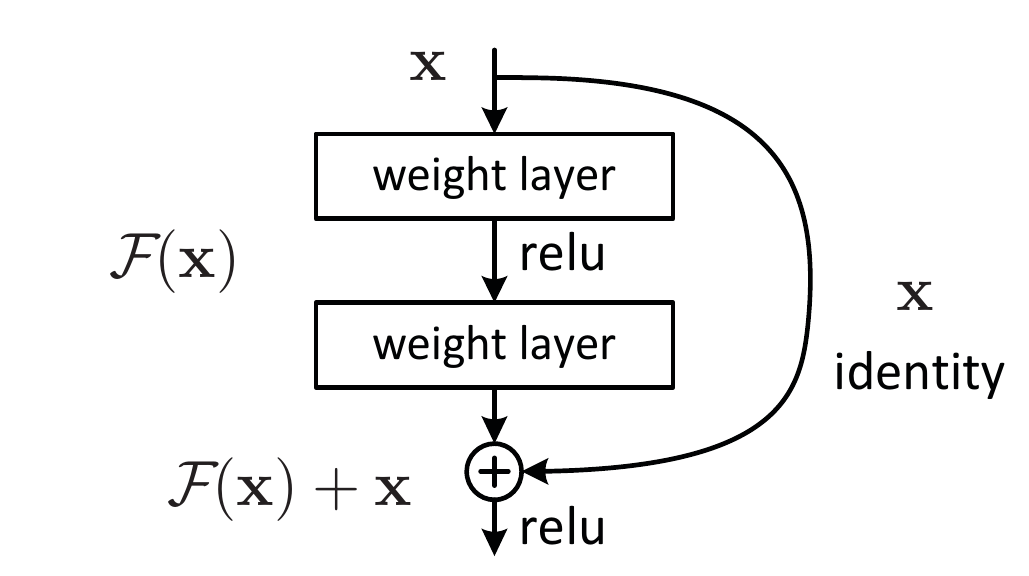
<!-- https://arxiv.org/abs/1512.03385 -->



In [ ]:
BATCH_SIZE = 4
LEARNING_RATE = 1e-5
NUM_OF_EPOCH = 10

In [ ]:
train_dataloader, testA_dataloader, testB_dataloader = get_glas(BATCH_SIZE)

In [ ]:
class ResNetBlock(nn.Module):
    c_out : int
    subsample : bool = False

    def setup(self):
        self.conv_0 = nn.Conv(
            self.c_out,
            kernel_size=(1, 1),
            strides=(1, 1),
            use_bias=False
        )
        self.norm_0 = nn.BatchNorm()
        
        self.conv_1 = nn.Conv(
            self.c_out,
            kernel_size=(3, 3),
            strides=(1, 1) if not self.subsample else (2, 2),
            use_bias=False
        )
        self.norm_1 = nn.BatchNorm()
        
        self.conv_downsample = nn.Conv(
            self.c_out,
            kernel_size=(1, 1),
            strides=(2, 2)
        )

    def __call__(self, x, train=True):
        z = self.conv_0(x)
        z = self.norm_0(z, use_running_average=not train)
        z = nn.relu(z)
        
        z = self.conv_1(x)
        z = self.norm_1(z, use_running_average=not train)

        if self.subsample:
            x = self.conv_downsample(x)

        x_out = nn.relu(z + x)
        return x_out

In [ ]:
class ResNet(nn.Module):
    num_classes : int
    num_blocks : tuple = (3, 4, 6, 3)
    c_hidden : tuple = (64, 128, 256, 512)

    def setup(self):
        self.conv_in = nn.Conv(
            self.c_hidden[0],
            kernel_size=(3, 3),
            use_bias=False
        )
        self.norm_in = nn.BatchNorm()
        self.avg_pool = partial(nn.avg_pool, window_shape=(1, 1))
        self.blocks = [
            ResNetBlock(
                c_out=self.c_hidden[block_idx],
                subsample=(bc == 0 and block_idx > 0)
            ) 
            for block_idx, block_count in enumerate(self.num_blocks)
            for bc in range(block_count) 
        ]
        self.fully_connected = nn.Dense(self.num_classes)
        

    def __call__(self, x, train):
        x = self.conv_in(x)
        x = self.norm_in(x, use_running_average=not train)
        x = nn.relu(x)

        for block in self.blocks:
            x = block(x, train=train)

        # Mapping to classification output
        x = self.avg_pool(x)
        x = x.reshape((x.shape[0], -1))

        x = self.fully_connected(x)
        return x

In [ ]:
model = ResNet(num_classes=2)
rng_key = jax.random.PRNGKey(0)
init_input = jnp.ones((1, 512,512, 3))

In [ ]:
# Tabulate
print(model.tabulate(rng_key, init_input, train=True, console_kwargs={'force_jupyter': True, "width": 180}))

In [ ]:
class BatchNormTrainState(train_state.TrainState):
    batch_stats: Any

In [ ]:
def init_train_state(
    model, random_key, init_input, learning_rate
) -> train_state.TrainState:
    variables = model.init(random_key, init_input, train=True)
    optimizer = optax.adam(learning_rate)
    return BatchNormTrainState.create(
        apply_fn = model.apply,
        tx=optimizer,
        params=variables['params'],
        batch_stats=variables['batch_stats']
    )

state = init_train_state(
    model, rng_key, init_input, LEARNING_RATE
)

In [ ]:
@jax.jit
def train_step(state, batch):
  def loss_fn(params, batch_stats):
    logits, new_model_state = state.apply_fn({
            'params': params,
            'batch_stats': batch_stats
        },
        batch['image'],
        train=True,
        mutable=['batch_stats']
    )
    loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=batch['grade']).mean()
    return loss, new_model_state

  (loss, new_state), grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params, state.batch_stats)
  state = state.apply_gradients(grads=grads, batch_stats=new_state['batch_stats'])        
  return state

In [ ]:
def compute_metrics(*, state, batch):
  logits = state.apply_fn({
      'params': state.params,
      'batch_stats': state.batch_stats
      },
      batch['image'],
      train=False,
      mutable=False
  )
  loss = optax.softmax_cross_entropy_with_integer_labels(
        logits=logits, labels=batch['grade']).mean()
  accuracy = np.mean(np.argmax(logits, -1) == batch['grade'])
  f1score  = f1_score(np.argmax(logits, -1), batch['grade'], average="macro")
  return {'loss': loss, 'accuracy': accuracy, "f1": f1score}

In [ ]:
metrics_history = {
    'train_loss': [],
    'train_accuracy': [],
    'train_f1': [],
    'testA_loss': [],
    'testA_accuracy': [],
    'testA_f1': [],
    'testB_loss': [],
    'testB_accuracy': [],
    'testB_f1': [],
}

for epoch in range(NUM_OF_EPOCH):
    train_len = len(train_dataloader)
    testA_len = len(testA_dataloader)
    testB_len = len(testB_dataloader)

    train_metrics = np.zeros((train_len, 3))
    with tqdm.tqdm(total=train_len+testA_len+testB_len, desc=f"Epoch: {epoch}") as pbar:
      for step, batch in enumerate(iter(train_dataloader)):
        state = train_step(state, batch)
        metrics = compute_metrics(state=state, batch=batch)
        train_metrics[step, 0] = metrics["loss"]
        train_metrics[step, 1] = metrics["accuracy"]
        train_metrics[step, 2] = metrics["f1"]
        pbar.set_postfix(dict(
            mean_loss=np.mean(train_metrics[:(step+1), 0]),
        ))
        pbar.update()

      metrics_history['train_loss'].append(np.mean(train_metrics[:, 0]))
      metrics_history['train_accuracy'].append(np.mean(train_metrics[:, 1]))
      metrics_history['train_f1'].append(np.mean(train_metrics[:, 2]))

      # Validation
      for name, test_len, test_ds in [("testA", testA_len, testA_dataloader), ("testB", testB_len, testB_dataloader)]:
          test_metrics = np.zeros((test_len, 3))
          for step, test_batch in enumerate(iter(test_ds)):
            metrics = compute_metrics(state=state, batch=test_batch)
            test_metrics[step, 0] = metrics["loss"]
            test_metrics[step, 1] = metrics["accuracy"]
            test_metrics[step, 2] = metrics["f1"]
            pbar.set_postfix(dict(
                mean_loss=metrics_history['train_loss'][-1],
                mean_accuracy=np.mean(test_metrics[:(step+1), 1]),
                mean_f1=np.mean(test_metrics[:(step+1), 2])
            ))
            pbar.update()

          metrics_history[f'{name}_loss'].append(np.mean(test_metrics[:, 0]))
          metrics_history[f'{name}_accuracy'].append(np.mean(test_metrics[:, 1]))
          metrics_history[f'{name}_f1'].append(np.mean(test_metrics[:, 2]))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.set_title('Loss')
ax2.set_title('Accuracy')
ax3.set_title('F1')
for dataset in ('train','testA', "testB"):
  ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')
  ax2.plot(metrics_history[f'{dataset}_accuracy'], label=f'{dataset}_accuracy')
  ax3.plot(metrics_history[f'{dataset}_f1'], label=f'{dataset}_f1')
ax1.legend()
ax2.legend()
ax3.legend()
plt.show()
plt.clf()

### Most useful architecture in bioinformatics - U-net
U-net was created as saimple architecture to segment biomedical images. Right now U-net is used commonly for image normalization, semantic segmentation and it found its usage in diffusion models.

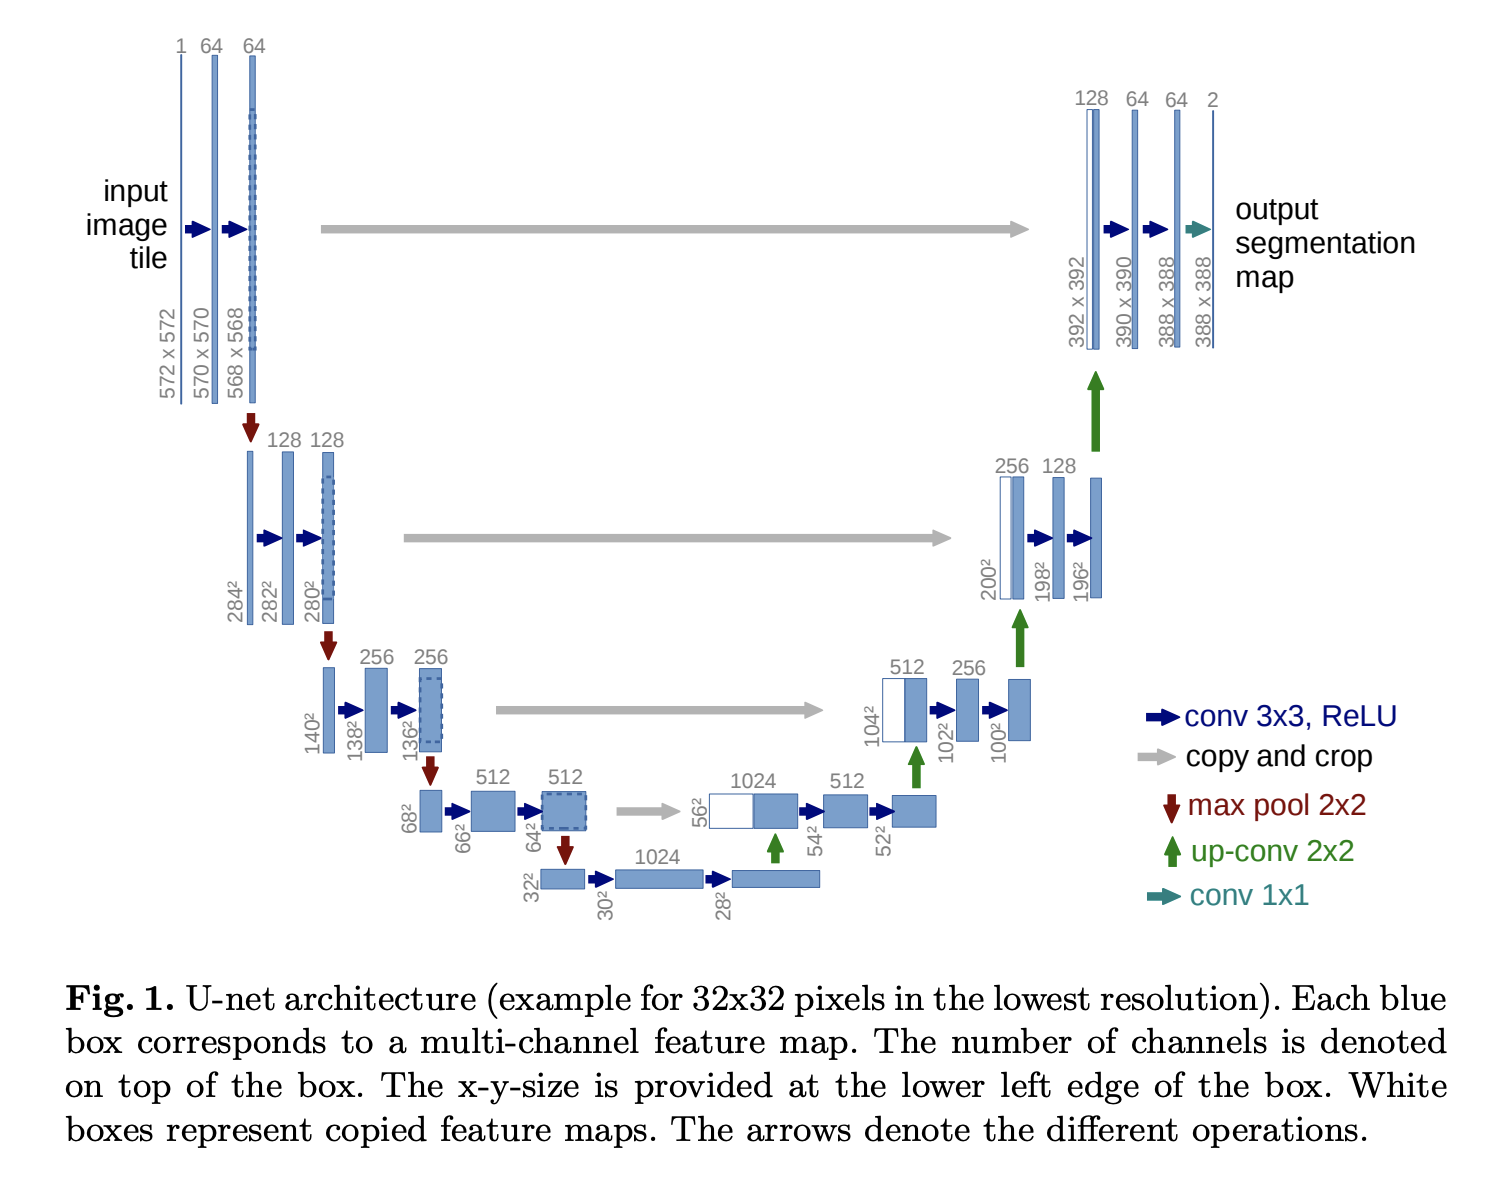

In [ ]:
class DownBlock(nn.Module):
    out_channels: int

    def setup(self):
        self.max_pool = partial(nn.max_pool, window_shape=(2, 2), strides=(2, 2))
        self.conv_0 = nn.Conv(
            self.out_channels,
            kernel_size=(3, 3),
            use_bias=False
        )
        self.norm_0 = nn.BatchNorm()
        
        self.conv_1 = nn.Conv(
            self.out_channels,
            kernel_size=(3, 3),
            use_bias=False
        )
        self.norm_1 = nn.BatchNorm()

    def __call__(self, x, train):
        x = self.max_pool(x)
        x = self.conv_0(x)
        x = self.norm_0(x, use_running_average=not train)
        x = nn.relu(x)

        x = self.conv_1(x)
        x = self.norm_1(x, use_running_average=not train)
        x = nn.relu(x)
        return x

In [ ]:
class UpBlock(nn.Module):
    out_channels: int

    def setup(self):
        self.conv_0 = nn.Conv(
            self.out_channels,
            kernel_size=(3, 3),
            use_bias=False
        )
        self.norm_0 = nn.BatchNorm()

        self.conv_1 = nn.Conv(
            self.out_channels,
            kernel_size=(3, 3),
            use_bias=False
        )
        self.norm_1 = nn.BatchNorm()

    def __call__(self, x, res, train):
        x = jax.image.resize(x, shape=(x.shape[0], x.shape[1] * 2, x.shape[2] * 2, x.shape[3]), method='nearest')
        x = jnp.concatenate([x, res], 3)
        x = self.conv_0(x)
        x = self.norm_0(x, use_running_average=not train)
        x = nn.relu(x)

        x = self.conv_1(x)
        x = self.norm_1(x, use_running_average=not train)
        x = nn.relu(x)
        return x

In [ ]:
class UNet(nn.Module):
    out_channels: int = 1
    channels = [64, 128, 256, 512, 1024]

    def setup(self):
        self.initial_conv = nn.Conv(
            self.channels[0],
            kernel_size=(3, 3),
            strides=(1, 1),
            padding=1,
        )
        self.output_conv = nn.Conv(
            self.out_channels,
            kernel_size=(3, 3),
            padding=1,
        )
        self.down = [
            DownBlock(out_channels=self.channels[idx])
            for idx in range(len(self.channels))
        ]
        self.up = [
            UpBlock(out_channels=self.channels[-idx-1])
            for idx in range(len(self.channels))
        ]

    def __call__(self, x, train):
        x = self.initial_conv(x)
        partials = [x]
        
        for block in self.down:
            x = block(x, train)
            partials.append(x)
            
        partials.pop()
        
        for idx, block in enumerate(self.up):
            res = partials[-idx-1]
            x = block(x, res, train)

        x = self.output_conv(x)
        return x

In [ ]:
BATCH_SIZE = 4
LEARNING_RATE = 1e-4
NUM_OF_EPOCH = 10

In [ ]:
model = UNet()
rng_key = jax.random.PRNGKey(0)
init_input = jnp.ones((1, 512,512, 3))

In [ ]:
# Tabulate
print(model.tabulate(rng_key, init_input, train=True, console_kwargs={'force_jupyter': True, "width": 180}))

In [ ]:
class BatchNormTrainState(train_state.TrainState):
    batch_stats: Any

In [ ]:
def init_train_state(
    model, random_key, init_input, learning_rate
) -> train_state.TrainState:
    variables = model.init(random_key, init_input, train=True)
    optimizer = optax.adam(learning_rate)
    return BatchNormTrainState.create(
        apply_fn = model.apply,
        tx=optimizer,
        params=variables['params'],
        batch_stats=variables['batch_stats']
    )

state = init_train_state(
    model, rng_key, init_input, LEARNING_RATE
)

In [ ]:
@jax.jit
def dice_coef(y_true, y_pred):
    y_true = jnp.ravel(y_true)
    y_pred = jnp.ravel(y_pred)
    intersection = jnp.sum(y_true * y_pred)
    return 2.0 * intersection / (jnp.sum(y_true) + jnp.sum(y_pred) + 1)

@jax.jit
def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)



In [ ]:
@jax.jit
def train_step(state, batch):
  def loss_fn(params, batch_stats):
    logits, new_model_state = state.apply_fn({
            'params': params,
            'batch_stats': batch_stats
        },
        batch['image'],
        train=True,
        mutable=['batch_stats']
    )
    loss_bce = optax.sigmoid_binary_cross_entropy(
            logits=logits.squeeze(), labels=batch['annotation_image']).mean()
    loss_dice = dice_coef_loss(logits.squeeze(), batch['annotation_image'])
    loss = loss_dice
    return loss, new_model_state

  (loss, new_state), grads = jax.value_and_grad(loss_fn, has_aux=True)(state.params, state.batch_stats)
  state = state.apply_gradients(grads=grads, batch_stats=new_state['batch_stats'])        
  return state

In [ ]:
@jax.jit
def compute_metrics(*, state, batch):
    logits = state.apply_fn({
        'params': state.params,
        'batch_stats': state.batch_stats
        },
        batch['image'],
        train=False,
        mutable=False
    )
    loss_bce = optax.sigmoid_binary_cross_entropy(
            logits=logits.squeeze(), labels=batch['annotation_image']).mean()
    loss_dice = dice_coef_loss(logits.squeeze(), batch['annotation_image'])
    loss = loss_dice

    y_true = batch['annotation_image']
    y_pred = jnp.where(nn.sigmoid(logits.squeeze()) > 0.5, 1, 0) 
    
    intersection = jnp.sum(y_true * y_pred)
    union = jnp.sum(y_true) + jnp.sum(y_pred)
    iou = intersection / union
    
    return {'loss': loss, 'iou': iou}

In [ ]:
metrics_history = {
    'train_loss': [],
    'train_iou': [],
    'testA_loss': [],
    'testA_iou': [],
    'testB_loss': [],
    'testB_iou': [],
}

train_dataloader, testA_dataloader, testB_dataloader = get_glas(BATCH_SIZE)

for epoch in range(NUM_OF_EPOCH):
    train_len = len(train_dataloader)
    testA_len = len(testA_dataloader)
    testB_len = len(testB_dataloader)

    train_metrics = np.zeros((train_len, 2))
    with tqdm.tqdm(total=train_len+testA_len+testB_len, desc=f"Epoch: {epoch}") as pbar:
      for step, batch in enumerate(iter(train_dataloader)):
        state = train_step(state, batch)
        metrics = compute_metrics(state=state, batch=batch)
        train_metrics[step, 0] = metrics["loss"]
        train_metrics[step, 1] = metrics["iou"]
        pbar.set_postfix(dict(
            mean_loss=np.mean(train_metrics[:(step+1), 0]),
        ))
        pbar.update()

      metrics_history['train_loss'].append(np.mean(train_metrics[:, 0]))
      metrics_history['train_iou'].append(np.mean(train_metrics[:, 1]))

      # Validation
      for name, test_len, test_ds in [("testA", testA_len, testA_dataloader), ("testB", testB_len, testB_dataloader)]:
          test_metrics = np.zeros((test_len, 2))
          for step, test_batch in enumerate(iter(test_ds)):
            metrics = compute_metrics(state=state, batch=test_batch)
            test_metrics[step, 0] = metrics["loss"]
            test_metrics[step, 1] = metrics["iou"]
            pbar.set_postfix(dict(
                mean_loss=metrics_history['train_loss'][-1],
                mean_iou=np.mean(test_metrics[:(step+1), 1]),
            ))
            pbar.update()

          metrics_history[f'{name}_loss'].append(np.mean(test_metrics[:, 0]))
          metrics_history[f'{name}_iou'].append(np.mean(test_metrics[:, 1]))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Loss')
ax2.set_title('IOU')
for dataset in ('train','testA', "testB"):
  ax1.plot(metrics_history[f'{dataset}_loss'], label=f'{dataset}_loss')
  ax2.plot(metrics_history[f'{dataset}_iou'], label=f'{dataset}_iou')
ax1.legend()
ax2.legend()
plt.show()
plt.clf()

In [ ]:
single_batch = next(iter(get_glas(4)[0]))
figure = plt.figure(figsize=(20,20))
logits = state.apply_fn({
    'params': state.params,
    'batch_stats': state.batch_stats
    },
    single_batch["image"],
    train=False,
    mutable=False
)
preds = jnp.where(nn.sigmoid(logits.squeeze()) > 0.5, 1, 0) 
rows = len(single_batch)+1

for i in range(rows):
    plt.subplot(rows, 3, 3 * i+1, title=single_batch["grade"][i])
    plt.imshow(single_batch["image"][i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplot(rows, 3, 3 * i+2 , title=single_batch["grade"][i])
    plt.imshow(single_batch["annotation_image"][i])
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows, 3, 3 * i+3, title=single_batch["grade"][i])
    plt.imshow(preds[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)


### Additional resources

* [Great resources from University of Amsterdam](https://uvadlc-notebooks.readthedocs.io/en/latest/)
* [JAX documentation](https://jax.readthedocs.io/en/latest/)
* [Flax documentation](https://flax.readthedocs.io/en/latest/)
* [Optax documetation](https://optax.readthedocs.io/en/latest/)